In [ ]:
# Instructions
"""
1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web 
(such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
2. Create a basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code 
the functions by hand (to build your intuition and insight), or use functions in an existing package.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes) and submit a link to the video as part of your homework submission.
"""

In [19]:
import networkx as nx
#print("NetworkX version:", nx.__version__)
import matplotlib.pyplot as plt
import requests
import io
from itertools import combinations

In [ ]:
# Dataset: https://networkrepository.com/bio-MUTAG-g1.php
"""
@inproceedings{nr-aaai15,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {Proceedings of the Twenty-Ninth AAAI Conference on Artificial Intelligence},
      url={http://networkrepository.com},
      year={2015}
  }
"""

In [2]:
# GitHub
url = "https://raw.githubusercontent.com/RonBalaban/CUNY-SPS/refs/heads/main/DATA620//HW1/bio-CE-LC.edges"
# Download file content
response = requests.get(url)
# raise error if download failed
response.raise_for_status()  

# Convert into file-like object for networkx
file_like = io.StringIO(response.text)

# Load weighted edgelist
G = nx.read_edgelist(file_like, data=[("weight", float)])

# Summary
print("Basic Graph Info")
print("----------------")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Basic Graph Info
----------------
Number of nodes: 1387
Number of edges: 1648
Directed: False


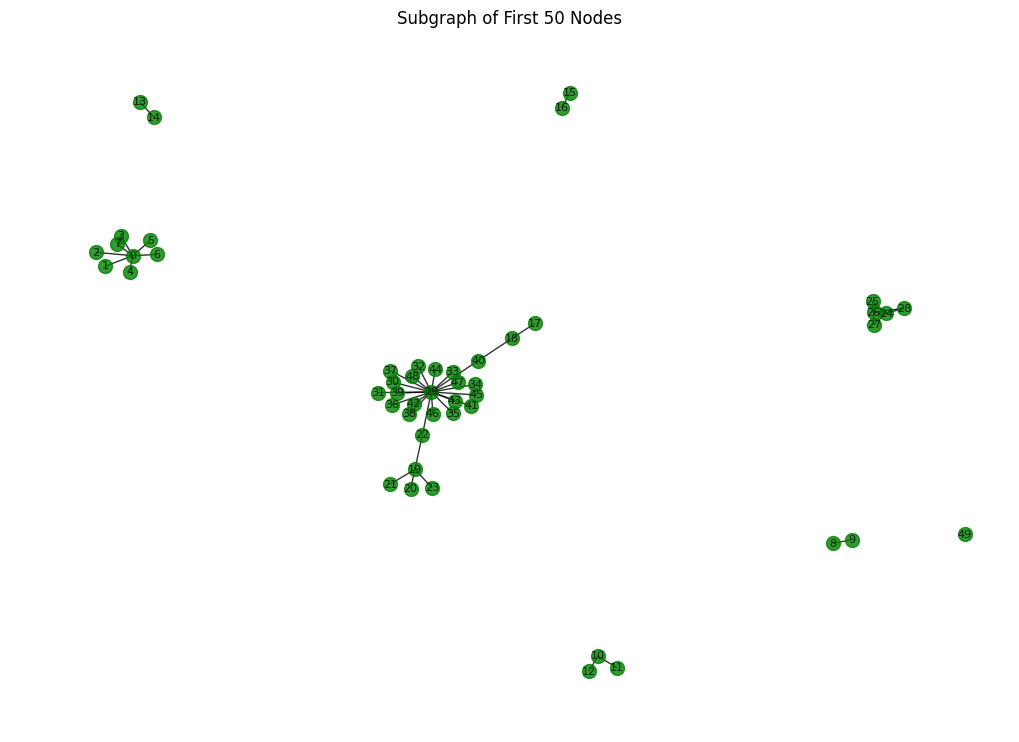

In [12]:
# Subgraph of first 50 nodes
nodes_subset_50 = list(G.nodes())[:50]
G_sub = G.subgraph(nodes_subset_50)

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw(
    G_sub, pos,
    node_size=100,
    node_color="green",
    edge_color="black",
    alpha=0.8,
    with_labels=True,
    font_size=8
)
plt.title("Subgraph of First 50 Nodes")
plt.show()

Filtered Subgraph Info
----------------------
Number of nodes: 27
Number of edges: 26


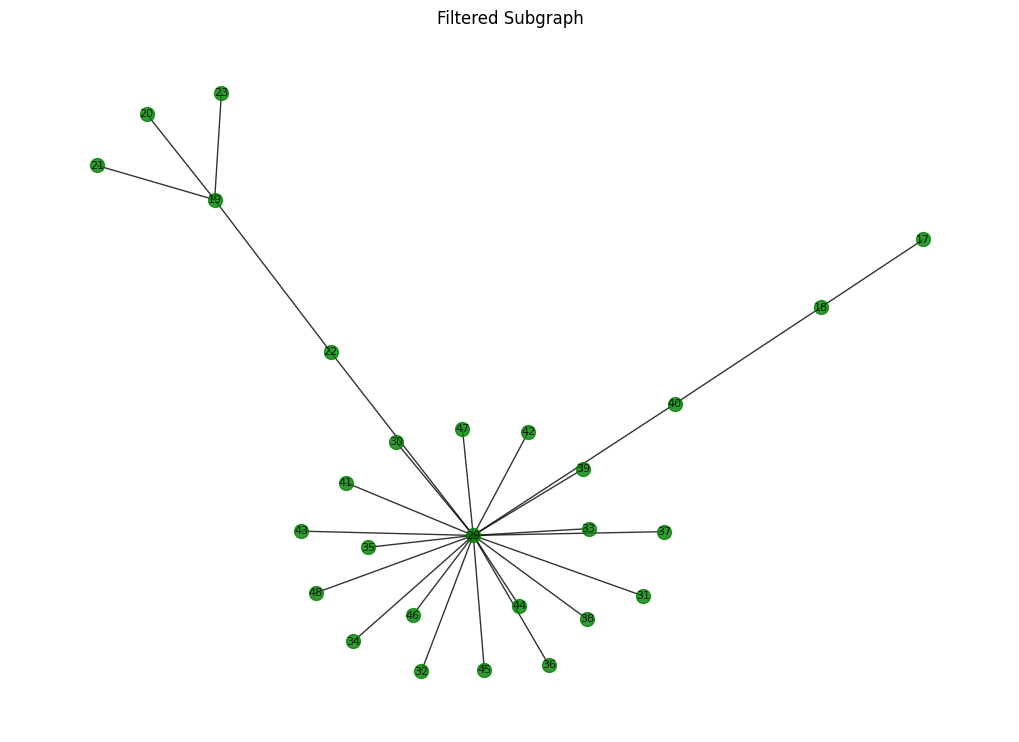

In [11]:
# Subgraph - only the central cluster
exclude_nodes = list(range(0, 17)) + list(range(24, 29)) + [49]

# Subset of first 50 nodes, excluding those above
nodes_subset_filtered = [n for n in list(G.nodes())[:50] if int(n) not in exclude_nodes] #List Comprehension
G_sub_filtered = G.subgraph(nodes_subset_filtered).copy()

# Summary of filtered subset
print("Filtered Subgraph Info")
print("----------------------")
print(f"Number of nodes: {G_sub_filtered.number_of_nodes()}")
print(f"Number of edges: {G_sub_filtered.number_of_edges()}")

# Plot
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G_sub_filtered, seed=42)
nx.draw(
    G_sub_filtered, pos,
    node_size=100,
    node_color="green",
    edge_color="black",
    alpha=0.8,
    with_labels=True,
    font_size=8
)
plt.title("Filtered Subgraph (Central Cluster)")
plt.show()

In [18]:
# Diameter
if nx.is_connected(G_sub_filtered):
    diameter = nx.diameter(G_sub_filtered)
else:
    largest_cc = max(nx.connected_components(G_sub_filtered), key=len)
    G_cc = G_sub_filtered.subgraph(largest_cc).copy()
    diameter = nx.diameter(G_cc)

print(f"Diameter of filtered subgraph: {diameter}")

Diameter of filtered subgraph: 6


Longest Path: ['20', '19', '22', '29', '40', '18', '17']
Length of Longest Path (edges): 6


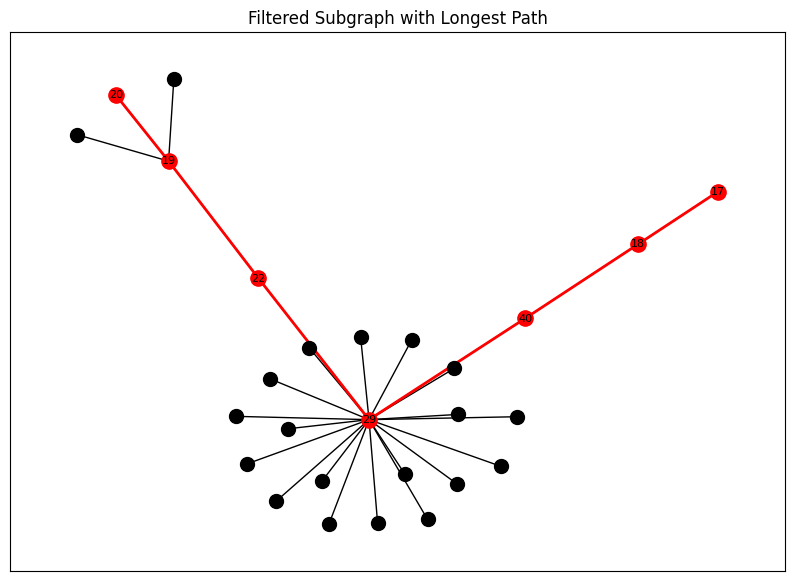

In [21]:
# Longest path (no repeats)
longest_path = []
for u, v in combinations(G_sub_filtered.nodes(), 2):
    for path in nx.all_simple_paths(G_sub_filtered, source=u, target=v):
        if len(path) > len(longest_path):
            longest_path = path

print("Longest Path:", longest_path)
print("Length of Longest Path (edges):", len(longest_path)-1)

# Prepare edges of the longest path
path_edges = list(zip(longest_path, longest_path[1:]))

# Plot
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G_sub_filtered, seed=42)

# Draw all nodes/edges 
nx.draw_networkx_nodes(G_sub_filtered, pos, node_size=100, node_color="black")
nx.draw_networkx_edges(G_sub_filtered, pos, edgelist=G_sub_filtered.edges(), edge_color="black")
nx.draw_networkx_labels(G_sub_filtered, pos, font_size=8)

# Highlight longest path
nx.draw_networkx_edges(G_sub_filtered, pos, edgelist=path_edges, edge_color="red", width=2)
nx.draw_networkx_nodes(G_sub_filtered, pos, nodelist=longest_path, node_color="red", node_size=120)

plt.title("Filtered Subgraph with Longest Path")
plt.show()

In [22]:
# Adjacency dictionary
adj_dict_sorted = {
    node: sorted(list(G_sub_filtered.neighbors(node)))
    for node in sorted(G_sub_filtered.nodes(), key=int)
}

print(f"Adjacency Dictionary: {adj_dict_sorted}")

Adjacency Dictionary: {'17': ['18'], '18': ['17', '40'], '19': ['20', '21', '22', '23'], '20': ['19'], '21': ['19'], '22': ['19', '29'], '23': ['19'], '29': ['22', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48'], '30': ['29'], '31': ['29'], '32': ['29'], '33': ['29'], '34': ['29'], '35': ['29'], '36': ['29'], '37': ['29'], '38': ['29'], '39': ['29'], '40': ['18', '29'], '41': ['29'], '42': ['29'], '43': ['29'], '44': ['29'], '45': ['29'], '46': ['29'], '47': ['29'], '48': ['29']}
